In [1]:
#Analyze how treatment type impacts implement_quality or training_score.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load the data
cctv_data = pd.read_csv('cctv_full data.csv')

# Display information on the dataset
print(cctv_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3416 non-null   int64  
 1   ps_code                 3416 non-null   float64
 2   urban                   3416 non-null   object 
 3   dist_urban              3416 non-null   float64
 4   strat_pca               3416 non-null   float64
 5   treatment               3416 non-null   object 
 6   group                   3416 non-null   object 
 7   dist_id                 3416 non-null   float64
 8   implement_quality       2293 non-null   float64
 9   training_score          3416 non-null   float64
 10  comm_outreach_strength  2293 non-null   float64
 11  regular_whd             3416 non-null   float64
 12  women_whd               3416 non-null   float64
 13  dayofweek               3416 non-null   object 
 14  timeofday               3416 non-null   

In [2]:
# Check for null values in specific columns before dropping
print("Null values before dropping:")
print(cctv_data[['implement_quality', 'training_score', 'treatment']].isnull().sum())

# Drop rows with null values in the specified columns
cctv_data_cleaned = cctv_data.dropna(subset=['implement_quality', 'training_score', 'treatment'])

# Check for null values after dropping
print("Null values after dropping:")
print(cctv_data_cleaned[['implement_quality', 'training_score', 'treatment']].isnull().sum())

# Display info for the cleaned dataset to confirm
print(cctv_data_cleaned.info())

Null values before dropping:
implement_quality    1123
training_score          0
treatment               0
dtype: int64
Null values after dropping:
implement_quality    0
training_score       0
treatment            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2293 entries, 0 to 3415
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2293 non-null   int64  
 1   ps_code                 2293 non-null   float64
 2   urban                   2293 non-null   object 
 3   dist_urban              2293 non-null   float64
 4   strat_pca               2293 non-null   float64
 5   treatment               2293 non-null   object 
 6   group                   2293 non-null   object 
 7   dist_id                 2293 non-null   float64
 8   implement_quality       2293 non-null   float64
 9   training_score          2293 non-null   float64
 10  comm_outreach_strength  229

In [3]:
# Drop rows with null values in specific columns and create a clean copy
cctv_data_cleaned = cctv_data.dropna(subset=['implement_quality', 'training_score', 'treatment']).copy()

# Now, convert 'treatment' to a categorical type in the new DataFrame
cctv_data_cleaned['treatment'] = cctv_data_cleaned['treatment'].astype('category')

<Axes: xlabel='training_score', ylabel='implement_quality'>

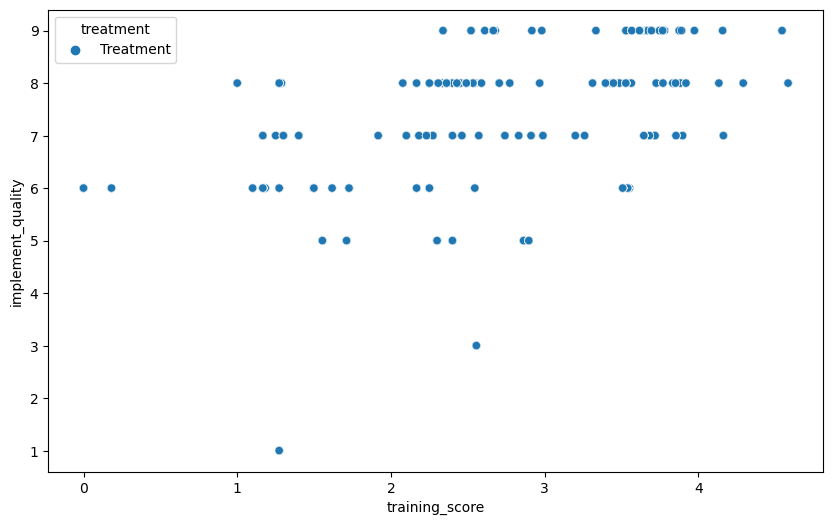

In [4]:
#Create a scatter plot to show the relationship between training_score and implement_quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cctv_data_cleaned, x='training_score', y='implement_quality', hue='treatment', alpha=0.6)

#Scatter plot shows where each point is a raw data relationship observation between training_score and implement_quality.  Treatment groups is noted by color coding.

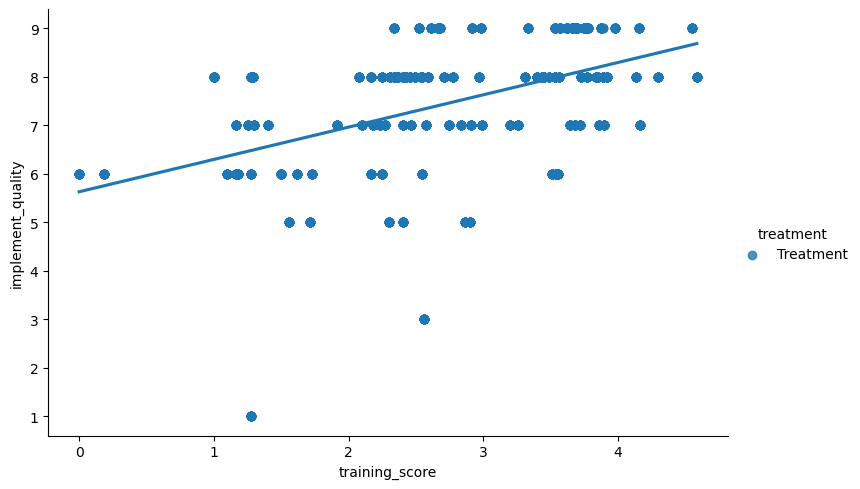

In [5]:
#Create regression line for each treatment group to see trends more clearly
sns.lmplot(data=cctv_data_cleaned, x='training_score', y='implement_quality', hue='treatment', ci=None, aspect=1.5)

#The regression trend line for each treatment group helps to visualize how training_score impacts implement_quality within each group. 

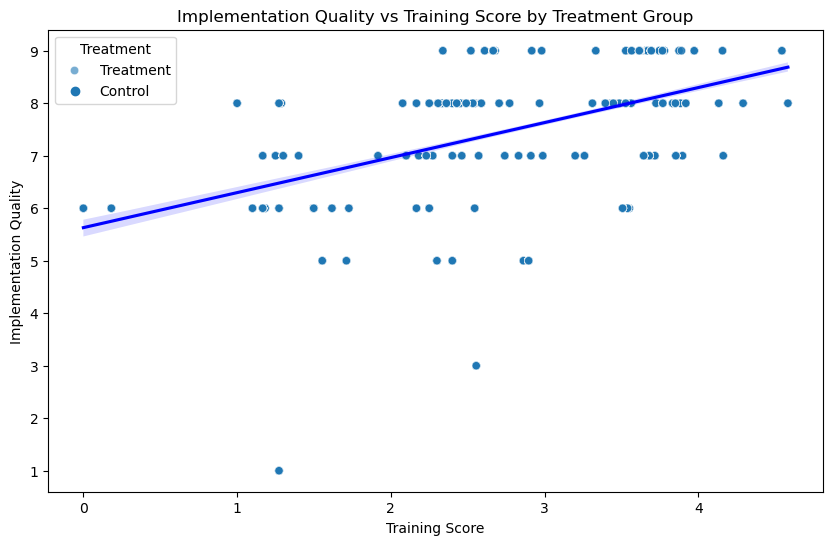

In [6]:
# Set up the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cctv_data_cleaned, x='training_score', y='implement_quality', hue='treatment', alpha=0.6)

# Regression lines for each treatment group
sns.regplot(data=cctv_data_cleaned[cctv_data_cleaned['treatment'] == 'Treatment'],
            x='training_score', y='implement_quality', scatter=False, label='Treatment', color='blue')
sns.regplot(data=cctv_data_cleaned[cctv_data_cleaned['treatment'] == 'Control'],
            x='training_score', y='implement_quality', scatter=False, label='Control', color='red')

# Customize the legend 
plt.legend(title='Treatment', labels=['Treatment', 'Control']) 

# Plot titles and labels
plt.title('Implementation Quality vs Training Score by Treatment Group')
plt.xlabel('Training Score')
plt.ylabel('Implementation Quality')

# Show the plot
plt.show()

#The scatter plot shows the spread of data points, while the regression lines indicate the direction and strength of the relationship between training_score and implement_quality within each treatment group. 

Columns in merged data: Index(['Unnamed: 0_x', 'ps_code', 'population_x', 'urban_x', 'dist_urban_x',
       'strat_pca_x', 'treatment_x', 'group_x', 'dist_id_x',
       'implement_quality_x', 'training_score_x', 'comm_outreach_strength_x',
       'regular_whd_x', 'women_whd_x', 'b_caw_rate', 'e_caw_rate',
       'Unnamed: 0_y', 'uid', 'gender', 'e_wcase', 'e_effective',
       'e_false_case', 'e_helpful', 'e_add_officer', 'e_add_female',
       'e_female_better', 'e_taken_seriously', 'e_prof_dev', 'e_work_help',
       'e_pol_impt', 'e_thana_impt', 'e_sensitivity', 'population_y',
       'urban_y', 'dist_urban_y', 'strat_pca_y', 'treatment_y', 'group_y',
       'dist_id_y', 'implement_quality_y', 'training_score_y',
       'comm_outreach_strength_y', 'regular_whd_y', 'women_whd_y', 'b_wcase',
       'b_effective', 'b_pol_impt', 'b_thana_impt', 'b_sensitivity',
       'b_helpful', 'b_female_better', 'b_add_officer', 'b_add_female',
       'Unnamed: 0', 'urban', 'dist_urban', 'strat_pca'

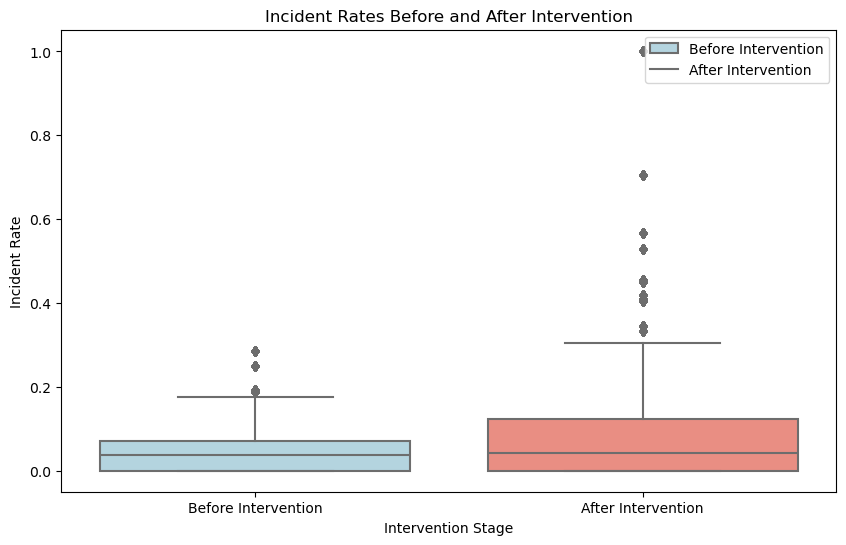

In [7]:
#Effectiveness of Police Interventions in High-Incidence Areas
#Comparsion of incident rates before and after intervention using a box plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data Files
citizen_caw = pd.read_csv('citizen_caw rates.csv')
citizen_full = pd.read_csv('citizen_full data.csv')
admin_long = pd.read_csv('admin_long data.csv')
admin_wide = pd.read_csv('admin_wide data.csv')
police_station = pd.read_csv('police_station personnel data.csv')
police_full = pd.read_csv('police_full data.csv')
cctv_full = pd.read_csv('cctv_full data.csv')

# Merge data on the common field 
data = pd.merge(citizen_caw, police_full, on='ps_code', how='inner')
data = pd.merge(data, cctv_full, on='ps_code', how='inner')

# Display columns in merged data
print("Columns in merged data:", data.columns)

# Create a new DataFrame for comparison of incident rates
incident_rates = pd.DataFrame({
    'Before Intervention': data['b_caw_rate'],
    'After Intervention': data['e_caw_rate']
})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_rates, palette=['lightblue', 'salmon'])

# Legend
plt.legend(['Before Intervention', 'After Intervention'], loc='upper right')

# Title, X-label, Y-label
plt.title('Incident Rates Before and After Intervention')
plt.xlabel('Intervention Stage')
plt.ylabel('Incident Rate')
plt.show()